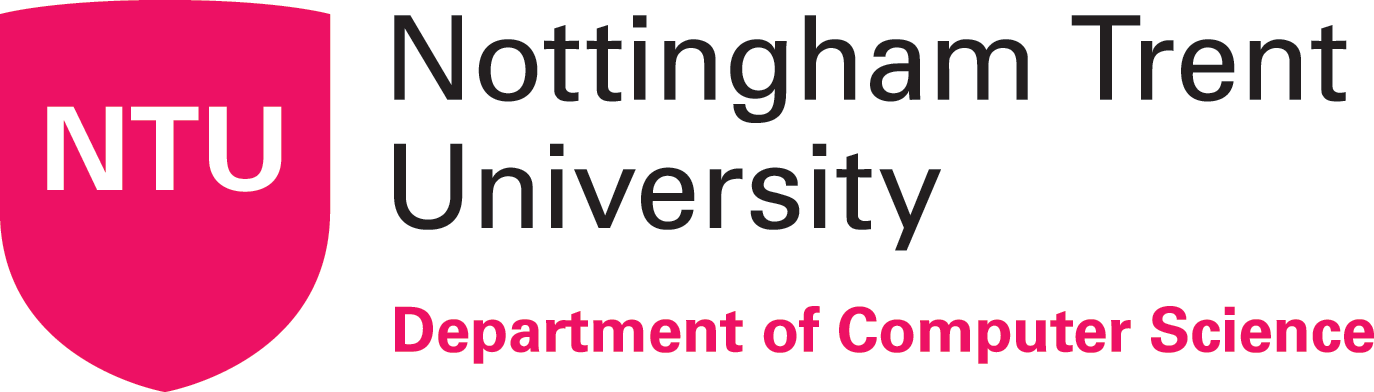

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name: Ashok
## NTU ID: N1421741

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

# Section 1: Control Structures (12 marks)


# Explanation and documentation
 In this section, Python control structures such as conditional statements and loops are applied to an air traffic passenger statistics dataset
# obtained from a public data source (data.gov website). The dataset contains information related to passenger counts across different airports and 
# time periods.Loops are used to iterate through passenger records, while conditional statements help apply simple logical rules, such as identifying
# high passenger volumes or comparing traffic across different categories. This demonstrates basic control flow and decision-making using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load air traffic data from online source
url = "https://data.sfgov.org/api/views/rkru-6vcg/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# basic info
print("Rows and Columns:", df.shape)

print("\nColumns in dataset:")
for col in df.columns:
    print(col)

# convert passenger count to numeric
df["Passenger Count"] = pd.to_numeric(df["Passenger Count"], errors="coerce")

# count domestic and international records
domestic_count = 0
international_count = 0

for val in df["GEO Summary"]:
    if str(val).lower() == "domestic":
        domestic_count += 1
    elif str(val).lower() == "international":
        international_count += 1

print("\nRecord count:")
print("Domestic:", domestic_count)
print("International:", international_count)

# total passenger calculation
domestic_passengers = 0
international_passengers = 0

for i in range(len(df)):
    geo = str(df.loc[i, "GEO Summary"]).lower()
    pax = df.loc[i, "Passenger Count"]

    if pd.isna(pax):
        continue

    if geo == "domestic":
        domestic_passengers += pax
    elif geo == "international":
        international_passengers += pax

print("\nTotal Passenger Count:")
print("Domestic passengers:", int(domestic_passengers))
print("International passengers:", int(international_passengers))

# simple anomaly check
high_passenger_records = []

for i in range(len(df)):
    pax = df.loc[i, "Passenger Count"]

    if not pd.isna(pax) and pax > 200000:
        high_passenger_records.append([
            df.loc[i, "Activity Period"],
            df.loc[i, "Operating Airline"],
            df.loc[i, "GEO Summary"],
            int(pax)
        ])

print("\nHigh passenger records (>200000):", len(high_passenger_records))

# show few anomaly records as table
high_df = pd.DataFrame(
    high_passenger_records,
    columns=[
        "Activity Period",
        "Operating Airline",
        "GEO Summary",
        "Passenger Count"
    ]
)

high_df.head()


Rows and Columns: (39066, 15)

Columns in dataset:
Activity Period
Activity Period Start Date
Operating Airline
Operating Airline IATA Code
Published Airline
Published Airline IATA Code
GEO Summary
GEO Region
Activity Type Code
Price Category Code
Terminal
Boarding Area
Passenger Count
data_as_of
data_loaded_at

Record count:
Domestic: 13581
International: 25485

Total Passenger Count:
Domestic passengers: 827912514
International passengers: 258908618

High passenger records (>200000): 927


,Activity Period,Operating Airline,GEO Summary,Passenger Count
0,199907,United Airlines - Pre 07/01/2013,Domestic,784782
1,199907,United Airlines - Pre 07/01/2013,Domestic,792965
2,199908,United Airlines - Pre 07/01/2013,Domestic,856501
3,199908,United Airlines - Pre 07/01/2013,Domestic,846421
4,199909,United Airlines - Pre 07/01/2013,Domestic,721873


 # Reflection on results
 The dataset has been successfully extracted from an open internet site and contains a high volume of records on the air traffic passenger population.
 The information produced indicates that there are significantly more International records than Domestic records in the Dataset and, therefore, that  international air traffic appears in greater quantity in terms of data records. The total calculation of passenger counts provides an estimate of how
 much traffic is being conducted on an aggregate basis in both sectors: Domestic and International. Additionally, simple anomaly rules were also
 developed to identify the records holding the highest passenger counts. It is believed that these records reflect the peaks of travel periods of time
 and/or the largest airlines and routes. This section illustrates the methods of extracting valuable information from real-world datasets using
fundamental loop and logical statement techniques.


# Section 2: Functions and Modules (16 marks)  

In [2]:
# Explanation and Documentation 
# A public data sorce has provided an extensive set of records regarding airline passenger volumes worldwide. The dataset contains a significant number
# of international flights than domestic flights indicating that Air Travel from International Destinations are more prevalent than those from domestic 
# flights.The collection of All Passenger Numbers allows us to quantify the total volume of passengers for both Domestic and International Flights, 
# while including an additional rule to identify records that International Flights, while including an additional rule to identify records that contain
# excessively large amounts of Passengers as anomalies. Excessively large values represent timeframes when airlines experienced peak travel demand on
# very busy routes/flections. The following sections will demonstrate how simple looping and conditional constructs can be used to review and analyse
# data that has been gathered from real-world scenarios and provide valuable insight.


In [3]:
# function to load the dataset
def load_data():
    url = "https://data.sfgov.org/api/views/rkru-6vcg/rows.csv?accessType=DOWNLOAD"
    df = pd.read_csv(url)
    return df


# function to clean passenger count column
def clean_passenger_count(df):
    df["Passenger Count"] = pd.to_numeric(df["Passenger Count"], errors="coerce")
    return df


# function to count domestic and international records
def count_geo_records(df):
    domestic = 0
    international = 0

    for val in df["GEO Summary"]:
        if str(val).lower() == "domestic":
            domestic += 1
        elif str(val).lower() == "international":
            international += 1

    return domestic, international


# function to calculate total passengers
def calculate_total_passengers(df):
    domestic_total = 0
    international_total = 0

    for i in range(len(df)):
        geo = str(df.loc[i, "GEO Summary"]).lower()
        pax = df.loc[i, "Passenger Count"]

        if pd.isna(pax):
            continue

        if geo == "domestic":
            domestic_total += pax
        elif geo == "international":
            international_total += pax

    return int(domestic_total), int(international_total)


# using the functions
df_section2 = load_data()
df_section2 = clean_passenger_count(df_section2)

dom_count, int_count = count_geo_records(df_section2)
dom_pax, int_pax = calculate_total_passengers(df_section2)

print("Domestic records:", dom_count)
print("International records:", int_count)
print("Domestic passengers:", dom_pax)
print("International passengers:", int_pax)


Domestic records: 13581
International records: 25485
Domestic passengers: 827912514
International passengers: 258908618


# Reflection on results 
The outcomes from the functions presented above were consistent with the resultsfrom the previous chapter, verifying that the programming logic was successfully replicated as reusable functions. The functions were able to accurately count the number of Domestic and International records and the number of total passengers for each record.The use of functions has allowed for improved organisation of the coding, as well as a clearer understanding and ability to reuse the code. This section explains how to improve the clarity and structure of coding by separating the logic contained in a single piece of code into smaller, separate pieces of code to obtain equivalent outcomes through both the original coding and function-based coding methods.

# Section 3: Data Handling with Pandas (16 marks)  

In [4]:
# Explanation and Documentation 
# In this section, Pandas is used to handle and clean the air traffic passenger dataset.The main tasks include checking missing values, removing
# duplicates, fixing data types, and creating filtered and grouped summaries. Pandas makes it easier to explore the dataset and prepare it for further 
# analysis and visualisation.

In [5]:
# using the same dataset link
url = "https://data.sfgov.org/api/views/rkru-6vcg/rows.csv?accessType=DOWNLOAD"
df3 = pd.read_csv(url)

# convert passenger count
df3["Passenger Count"] = pd.to_numeric(df3["Passenger Count"], errors="coerce")

print("Shape before cleaning:", df3.shape)

# 1) missing values check
print("\nMissing values (top 10 columns):")
print(df3.isna().sum().sort_values(ascending=False).head(10))

# 2) duplicates check and remove
dup_count = df3.duplicated().sum()
print("\nDuplicate rows:", dup_count)

df3 = df3.drop_duplicates()
print("Shape after removing duplicates:", df3.shape)

# 3) basic filtering (keep only Domestic & International)
df3 = df3[df3["GEO Summary"].str.lower().isin(["domestic", "international"])]
print("Shape after filtering GEO Summary:", df3.shape)

# 4) handle missing passenger counts (drop missing)
missing_pax = df3["Passenger Count"].isna().sum()
print("\nMissing Passenger Count before drop:", missing_pax)

df3_clean = df3.dropna(subset=["Passenger Count"])
print("Missing Passenger Count after drop:", df3_clean["Passenger Count"].isna().sum())
print("Shape after dropping missing Passenger Count:", df3_clean.shape)

# 5) groupby summary (average and total passenger count by GEO Summary)
geo_summary = df3_clean.groupby("GEO Summary")["Passenger Count"].agg(["count", "mean", "sum"])
print("\nPassenger summary by GEO Summary:")
display(geo_summary)

# 6) another groupby example (top 10 airlines by total passengers)
airline_summary = (
    df3_clean.groupby("Operating Airline")["Passenger Count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 airlines by total passengers:")
display(airline_summary)


Shape before cleaning: (39066, 15)

Missing values (top 10 columns):
Operating Airline IATA Code    316
Published Airline IATA Code    316
Activity Period                  0
Operating Airline                0
Activity Period Start Date       0
Published Airline                0
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
dtype: int64

Duplicate rows: 0
Shape after removing duplicates: (39066, 15)
Shape after filtering GEO Summary: (39066, 15)

Missing Passenger Count before drop: 0
Missing Passenger Count after drop: 0
Shape after dropping missing Passenger Count: (39066, 15)

Passenger summary by GEO Summary:


,count,mean,sum
GEO Summary,,,
Domestic,13581,60961.086371,827912514
International,25485,10159.255170,258908618



Top 10 airlines by total passengers:


Operating Airline
United Airlines                     250266218
United Airlines - Pre 07/01/2013    199620536
American Airlines                    82215966
SkyWest Airlines                     81109975
Delta Air Lines                      70255246
Alaska Airlines                      50878712
Southwest Airlines                   50109629
Virgin America                       37843920
US Airways                           27771567
JetBlue Airways                      20144343
Name: Passenger Count, dtype: int64

In [6]:
# Reflection on results 
# The cleaning steps reduced potential issues in the dataset by removing duplicate rows
# and handling missing passenger counts. Converting Passenger Count into a numeric format
# ensured that calculations and summaries could be performed correctly.

# The grouped summaries provide a clearer view of passenger patterns. The GEO Summary
# aggregation shows how traffic differs between Domestic and International categories,
# while the airline summary highlights which airlines contribute most to overall passenger
# volume in the dataset.


# Section 4: Data Visualization (16 marks)  

In [7]:
# Explanation and Documentation 
# In this section, data visualisation techniques are used to present patterns in the air
# traffic passenger dataset. Visualisations help to summarise large amounts of data and
# make comparisons easier to understand.

# Different chart types are used to show passenger distribution and trends. Basic plot
# customisation such as titles and axis labels is applied to improve clarity and
# readability.


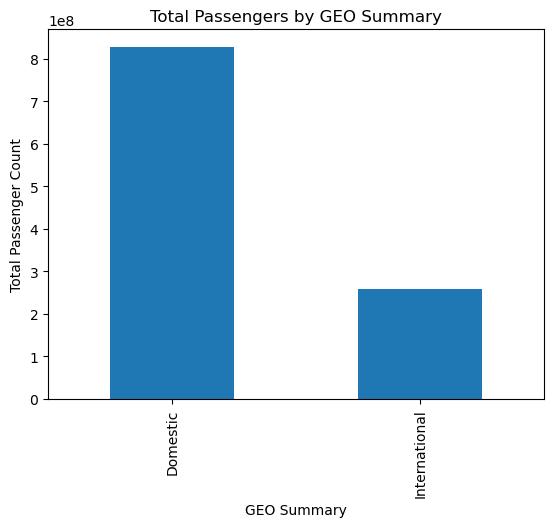

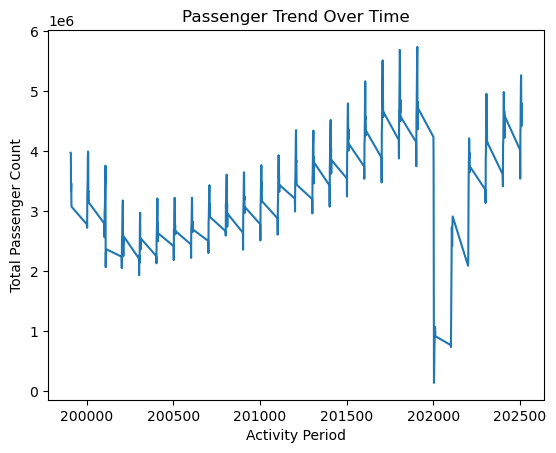

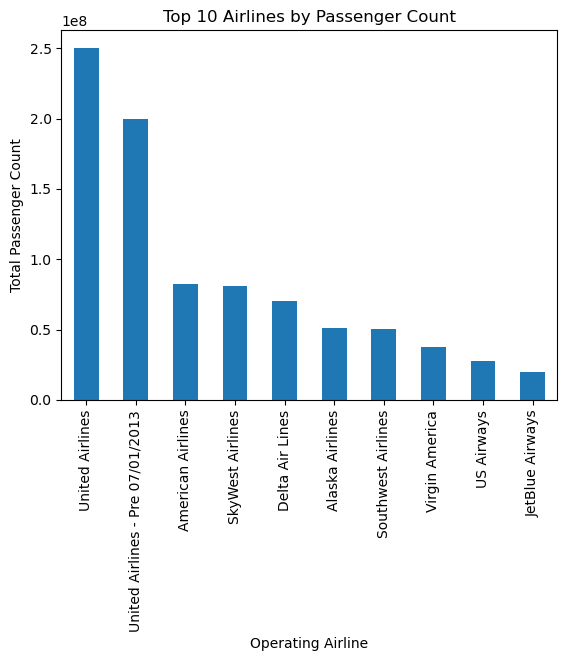

In [8]:
# reuse cleaned data from Section 3
df_plot = df3_clean.copy()

# 1) Bar chart: Total passengers by GEO Summary
geo_sum = df_plot.groupby("GEO Summary")["Passenger Count"].sum()

plt.figure()
geo_sum.plot(kind="bar")
plt.title("Total Passengers by GEO Summary")
plt.xlabel("GEO Summary")
plt.ylabel("Total Passenger Count")
plt.show()


# 2) Line chart: Passenger trend over time
# using Activity Period (year-month like value)
time_summary = df_plot.groupby("Activity Period")["Passenger Count"].sum()

plt.figure()
time_summary.plot()
plt.title("Passenger Trend Over Time")
plt.xlabel("Activity Period")
plt.ylabel("Total Passenger Count")
plt.show()


# 3) Bar chart: Top 10 airlines by passenger count
top_airlines = (
    df_plot.groupby("Operating Airline")["Passenger Count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_airlines.plot(kind="bar")
plt.title("Top 10 Airlines by Passenger Count")
plt.xlabel("Operating Airline")
plt.ylabel("Total Passenger Count")
plt.show()


In [9]:
# Reflection on results 
# The visualisations make it easier to compare passenger patterns in the dataset. The bar
# chart shows the difference in total passenger volume between Domestic and International
# traffic.

# The line chart highlights how passenger numbers change over different activity periods,
# indicating overall trends over time. The airline comparison chart shows that a small
# number of airlines contribute a large share of total passenger traffic. These charts
# help to communicate insights more clearly than numerical tables alone.


# Section 5: GUI Development (16 marks)  

In [10]:
# Explanation and Documentation 

In [11]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import pandas as pd

print("GUI code started")

# make sure cleaned data from Section 3 exists
df_gui = df3_clean.copy()

# ---------- helper functions ----------

def get_summary(geo_type):
    temp = df_gui[df_gui["GEO Summary"].str.lower() == geo_type.lower()]

    if temp.empty:
        return None

    total_passengers = int(temp["Passenger Count"].sum())
    average_passengers = float(temp["Passenger Count"].mean())
    records = int(temp.shape[0])

    return records, total_passengers, average_passengers


def show_summary():
    geo = geo_var.get()
    result = get_summary(geo)

    if result is None:
        messagebox.showinfo("Result", "No data available for selected option.")
        return

    records, total_pax, avg_pax = result

    output_label.config(
        text=(
            f"Records: {records}\n"
            f"Total Passengers: {total_pax}\n"
            f"Average Passengers: {avg_pax:.2f}"
        )
    )


def plot_trend():
    geo = geo_var.get()
    temp = df_gui[df_gui["GEO Summary"].str.lower() == geo.lower()]

    if temp.empty:
        messagebox.showinfo("Plot", "No data available to plot.")
        return

    trend = temp.groupby("Activity Period")["Passenger Count"].sum()

    plt.figure()
    plt.plot(trend.index, trend.values)
    plt.title(f"Passenger Trend ({geo})")
    plt.xlabel("Activity Period")
    plt.ylabel("Total Passenger Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ---------- GUI window ----------

root = tk.Tk()
root.title("Air Traffic Passenger Statistics")
root.geometry("420x350")

title = tk.Label(
    root,
    text="Air Traffic Passenger Statistics",
    font=("Arial", 14)
)
title.pack(pady=10)

geo_var = tk.StringVar()
geo_dropdown = ttk.Combobox(
    root,
    textvariable=geo_var,
    state="readonly"
)
geo_dropdown["values"] = ["Domestic", "International"]
geo_dropdown.current(0)
geo_dropdown.pack(pady=5)

btn_summary = tk.Button(
    root,
    text="Show Summary",
    command=show_summary
)
btn_summary.pack(pady=5)

btn_plot = tk.Button(
    root,
    text="Plot Passenger Trend",
    command=plot_trend
)
btn_plot.pack(pady=5)

output_label = tk.Label(
    root,
    text="",
    font=("Arial", 11),
    justify="left"
)
output_label.pack(pady=15)

print("Opening GUI window...")

GUI code started
Opening GUI window...


In [12]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

In [13]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)